In [1]:
## necessary packages/libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import scipy.stats
from scipy import stats
from scipy.stats import chi2, chi2_contingency

### Summary Data Analysis

In [2]:
## read in csv as pandas dataframe

participant_data = pd.read_csv("Demographics Information - Human Participants.csv")
print(participant_data.shape)
participant_data.head()

(175, 25)


,Study Name/Number,Race,Race Present,Ethnicity,Ethnicity Present,Study sample size,Sex Present,Male,Female,Unknown / Not Reported,...,Max Age,Country/Region,Location,Pre-existing conditions and/or Symptoms,Instruments used,Socioeconomic Status,Data Collected (differnent levels of),Date Study was Conducted/Published,Date Study Posted on PhysioNet,Field
0,A large scale 12-lead electrocardiogram databa...,X,0,X,0,"45, 152 patients",1,X,X,NaN,...,NaN,China,"Chapman University, Shaoxing People's Hospital...",Includes information about pre-existing condit...,GE MUSE ECG System,X,NaN,NaN,NaN,cardiac_electrophysiology
1,A multi-camera and multimodal dataset for post...,X,0,X,0,14,1,10,4,NaN,...,30.00,Portugal,Portugal (University of Minho),No clinical history of any abnormalities,MVN BIOMECH,X,"walking straight in a corridor, turning right ...",NaN,NaN,gait/balance/motion
2,A Pressure Map Dataset for In-bed Posture Clas...,X,0,X,0,Experiment 1: 13 participants Ex...,0,X,X,NaN,...,34.00,USA,Texas (University of Texas at Dallas),X,Experiment 1: Vista Medical FSA SoftFlex 2048 ...,X,in-bed posture pressure data,NaN,NaN,other
3,A Wearable Exam Stress Dataset for Predicting ...,X,0,X,0,10,0,X,X,NaN,...,NaN,USA,Texas (University of Houston,X,Empatica E4 wristband,NaN,"electrodermal activity, heart rate, blood vol...",NaN,NaN,multi_parameter
4,Abdominal and Direct Fetal ECG Database: Multi...,X,0,X,0,5 women in labor were analyzed,0,X,X,NaN,...,0.79,Poland,Department of Obstetrics at the Medical Univer...,Women in labor,"KOMPOREL System (ITAM Institute, Zabrze, Polan...",X,NaN,NaN,NaN,cardiac_electrophysiology


In [3]:
## assign column names, read in data, and print out the first 5 rows

data = participant_data[['Race Present', 'Ethnicity Present', 'Sex Present', 'Age Present']]
data = data.rename(columns={"Race Present": "Race", "Ethnicity Present": "Ethn.", "Age Present": "Age", "Sex Present": "Gender"})
data.head()
sums = data.sum()
print(sums)


Race       10
Ethn.       6
Gender    131
Age       126
dtype: int64


In [46]:
# Assuming you have already loaded participant_data and extracted the specified columns as data
# You want to count rows where all columns are 1 and where all columns are 0

# Count rows where all four columns are 1
count_all_ones = data[(data['Race'] == 1) &
                      (data['Ethn.'] == 1) &
                      (data['Gender'] == 1) &
                      (data['Age'] == 1)].shape[0]

# Count rows where all four columns are 0
count_all_zeros = data[(data['Race'] == 0) &
                       (data['Ethn.'] == 0) &
                       (data['Gender'] == 0) &
                       (data['Age'] == 0)].shape[0]

print("Count of rows where all columns are 1:", count_all_ones)
print("Count of rows where all columns are 0:", count_all_zeros)


Count of rows where all columns are 1: 5
Count of rows where all columns are 0: 36


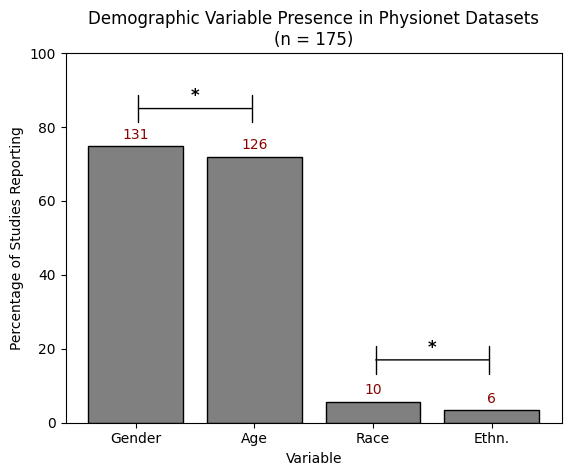

In [4]:
## Bar graph of demographics reporting frequency

def addlabels(x, y, c):
    for i in range(len(x)):
        plt.text(i, y[i]+2, c[i], ha='center', color='darkred')  # choose a color so the number above the bar is not confused with the y-axis labels

simple = {'Gender': sums[2] / 1.75, 'Age': sums[3] / 1.75, 'Race': sums[0] / 1.75, 'Ethn.': sums[1] / 1.75}

vars = list(simple.keys())
values = list(simple.values())

fig, ax = plt.subplots()
plt.bar(vars, values, color='grey', edgecolor='black')
plt.title('Demographic Variable Presence in Physionet Datasets\n(n = 175)')
plt.ylabel("Percentage of Studies Reporting")
plt.xlabel("Variable")
plt.ylim(0, 100)

counts = [sums[2], sums[3], sums[0], sums[1]]
addlabels(vars, values, counts)

plt.annotate('*', xy=(.5, 87), ha='center', color='black', fontsize=12, weight='bold')
plt.annotate("", xy=(0, 85), xytext=(1, 85), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color='black'))

plt.annotate('*', xy=(2.5, 19), ha='center', color='black', fontsize=12, weight='bold')
plt.annotate("", xy=(2, 17), xytext=(3, 17), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color='black'))

plt.show()


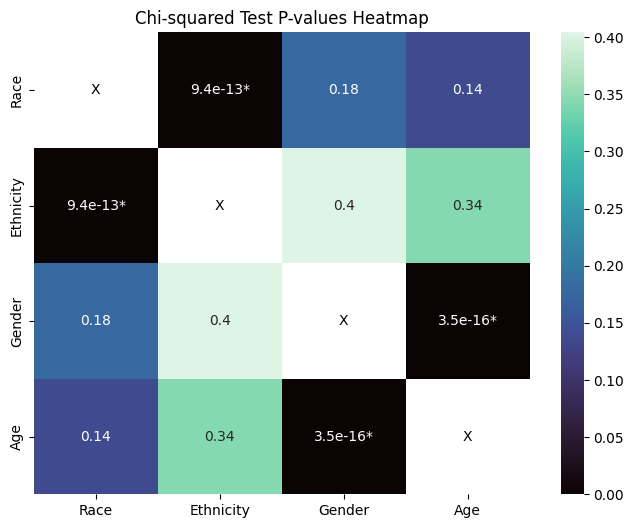

In [52]:
p_values = [
    [None, 9.4164e-13, 0.17625, 0.13602],
    [9.4164e-13, None, 0.40433, 0.34369],
    [0.17625, 0.40433, None, 3.4516e-16],
    [0.13602, 0.34369, 3.4516e-16, None]
]
variable_names = ['Race', 'Ethnicity', 'Gender', 'Age']

p_values_df = pd.DataFrame(p_values, index=variable_names, columns=variable_names)

plt.figure(figsize=(8, 6))

cmap = sns.cm.mako 

def format_annotation(val):
    if val is not None:
        if val < 0.0083:
            return f'{val:.2g}*'
        else:
            return f'{val:.2g}'
    return ''

annot_df = p_values_df.applymap(format_annotation)

sns.heatmap(p_values_df, annot=annot_df, cmap=cmap, fmt='', cbar=True, annot_kws={'fontsize': 10})

for i, label in enumerate(p_values_df.columns):
    plt.text(i + 0.5, i + 0.5, 'X', ha='center', va='center', fontsize=10)

plt.title('Chi-squared Test P-values Heatmap')
plt.show()


In [6]:
## isolate age data from total participants data

age_data = participant_data[['Age Present', 'Average Age', 'Min Age', 'Max Age', 'Field']]
print(age_data.shape)
age_data.head()

(175, 5)


,Age Present,Average Age,Min Age,Max Age,Field
0,1,NaN,NaN,NaN,cardiac_electrophysiology
1,1,25.4,18.00,30.00,gait/balance/motion
2,1,26.9,19.00,34.00,other
3,0,NaN,NaN,NaN,multi_parameter
4,1,NaN,0.69,0.79,cardiac_electrophysiology


In [7]:
no_outlier = age_data.drop(age_data.index[123])
avg_age = age_data["Average Age"].dropna()
avg_age.head()
print(avg_age.size)

68


In [8]:
cleaned = age_data
## .dropna(subset=['Ma Age', 'Total N'])
min_age = cleaned["Min Age"].dropna()
min_age.head()
# print(min_age.size)
print(min_age.mean())

23.949589743584617


In [9]:
## change 'Average Age' to 'Min Age' or 'Max Age' for min/max age histograms and density plots

maxAvg = cleaned.max(axis=0)['Average Age']
minAvg = cleaned.min(axis=0)['Average Age']
avgBins = (maxAvg-minAvg)
print(maxAvg, minAvg, avgBins)
print(cleaned['Average Age'].mean())
print(cleaned['Average Age'].median())

78.36 6.1 72.26
38.25492647058824
30.4


In [10]:
maxMax = cleaned.max(axis=0)['Max Age']
minMax = cleaned.min(axis=0)['Max Age']
maxBins = (maxMax-minMax)
print(maxMax, minMax, maxBins)
print(cleaned['Max Age'].mean())
print(cleaned['Max Age'].median())

99.1 0.79 98.30999999999999
54.69005291
53.0


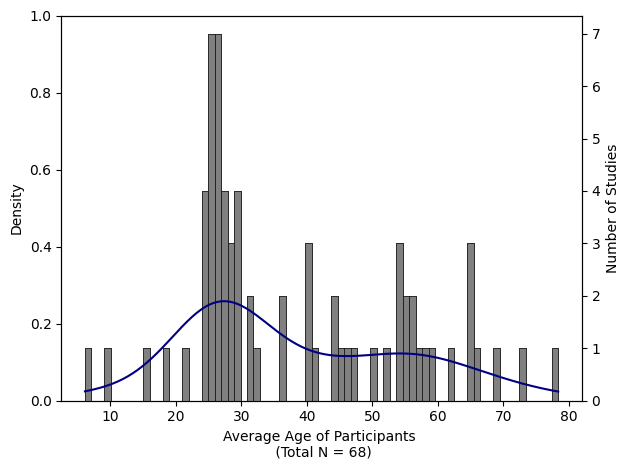

In [11]:
## age distribution histogram and density plots

fig, ax = plt.subplots()
plt.xlabel("Average Age of Participants \n (Total N = 68)")
plt.ylabel("Density")
ax2 = ax.twinx()
sns.histplot(avg_age, kde=True, ax=ax2, bins = 73, color = 'navy')
plt.hist(avg_age, color = 'grey', bins = 73, edgecolor = 'black', linewidth = .4)
plt.ylabel("Number of Studies")
plt.tight_layout()
plt.show()


In [12]:
## bootstrap confidence interval for the mean and median ages

## mean

samples = 10000  

def bootstrap_mean(data):
    resample = np.random.choice(data, size=len(data), replace=True)
    return np.mean(resample)

bootstrap_means = [bootstrap_mean(avg_age) for _ in range(samples)]

lower_percentile = .025
upper_percentile = 1 - lower_percentile

mean_lci = np.percentile(bootstrap_means, lower_percentile * 100)
mean_uci = np.percentile(bootstrap_means, upper_percentile * 100)

print("Bootstrap 95% CI for the mean:", (mean_lci, mean_uci))

## median 

def bootstrap_median(data):
    resample = np.random.choice(data, size=len(data), replace=True)
    return np.median(resample)

bootstrap_medians = [bootstrap_median(avg_age) for _ in range(samples)]

lower_percentile = (1 - 0.95) / 2
upper_percentile = 1 - lower_percentile

med_lci = np.percentile(bootstrap_medians, lower_percentile * 100)
med_uci = np.percentile(bootstrap_medians, upper_percentile * 100)

print("Bootstrap 95% CI for the median:", (med_lci, med_uci))

Bootstrap 95% CI for the mean: (34.468896691176475, 42.17692867647059)
Bootstrap 95% CI for the median: (27.485, 40.5)


### Chi-Square Tests

In [13]:
raceAgeInd=pd.crosstab(participant_data["Race Present"],participant_data["Age Present"])
print('Race Age table :\n',raceAgeInd)

Race Age table :
 Age Present    0    1
Race Present         
0             49  116
1              0   10


In [14]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(raceAgeInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)


chi2 statistic:     2.783
p-value:            0.095267
degrees of freedom: 1
expected frequencies:
 [[ 46.2 118.8]
 [  2.8   7.2]]


In [15]:
raceGenderInd=pd.crosstab(participant_data["Race Present"],participant_data["Sex Present"])
print('Race Gender table :\n',raceGenderInd)

Race Gender table :
 Sex Present    0    1
Race Present         
0             44  121
1              0   10


In [16]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(raceGenderInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     2.2864
p-value:            0.13051
degrees of freedom: 1
expected frequencies:
 [[ 41.48571429 123.51428571]
 [  2.51428571   7.48571429]]


In [17]:
ethnAgeInd=pd.crosstab(participant_data["Ethnicity Present"],participant_data["Age Present"])
print('Ethnicity Gender table :\n',ethnAgeInd)

Ethnicity Gender table :
 Age Present         0    1
Ethnicity Present         
0                  49  120
1                   0    6


In [18]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ethnAgeInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1.192
p-value:            0.27493
degrees of freedom: 1
expected frequencies:
 [[ 47.32 121.68]
 [  1.68   4.32]]


In [19]:
ethnGenderInd=pd.crosstab(participant_data["Ethnicity Present"],participant_data["Sex Present"])
print('Ethnicity Gender table :\n',ethnGenderInd)

Ethnicity Gender table :
 Sex Present         0    1
Ethnicity Present         
0                  44  125
1                   0    6


In [20]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ethnGenderInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     0.93275
p-value:            0.33415
degrees of freedom: 1
expected frequencies:
 [[ 42.49142857 126.50857143]
 [  1.50857143   4.49142857]]


In [21]:
genderAgeInd=pd.crosstab(participant_data["Sex Present"],participant_data["Age Present"])
print('Gender Age table :\n',genderAgeInd)

Gender Age table :
 Age Present   0    1
Sex Present         
0            36    8
1            13  118


In [22]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(genderAgeInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     80.919
p-value:            2.3516e-19
degrees of freedom: 1
expected frequencies:
 [[12.32 31.68]
 [36.68 94.32]]


In [23]:
raceEthnInd=pd.crosstab(participant_data["Race Present"],participant_data["Ethnicity Present"])
print('Race Ethn table :\n',raceEthnInd)

Race Ethn table :
 Ethnicity Present    0  1
Race Present             
0                  164  1
1                    5  5


In [24]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(raceEthnInd)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     55.358
p-value:            1.0045e-13
degrees of freedom: 1
expected frequencies:
 [[159.34285714   5.65714286]
 [  9.65714286   0.34285714]]


### Clinical Area of Interest

In [41]:
CAI = participant_data[['Field']]
CAI.head()

field_counts = CAI['Field'].value_counts()
# print(field_counts)

fields = field_counts.index
values = field_counts.values

print(fields, values)

Index(['cardiac_electrophysiology', 'multi_parameter', 'gait/balance/motion',
       'clinical', 'neuroelectric', 'cardiovascular', 'myoelectric', 'other',
       'cardiorespiratory', 'synthetic', 'gait/balance', 'radiology',
       'respiratory', 'cardoac_electrophysiology',
       'near infrared spectroscopy', 'skin_electrical'],
      dtype='object', name='Field') [53 32 16 14 13 13  9  8  5  3  2  2  2  1  1  1]


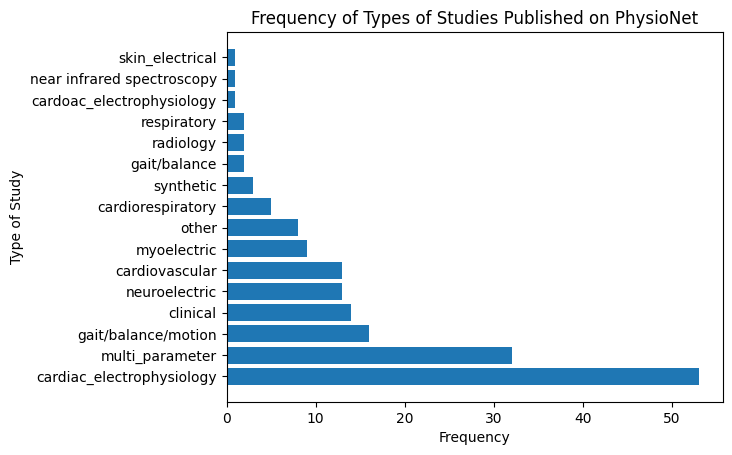

In [42]:
plt.barh(fields, values)

plt.xlabel("Frequency")
plt.ylabel("Type of Study")
plt.title("Frequency of Types of Studies Published on PhysioNet")
plt.show()

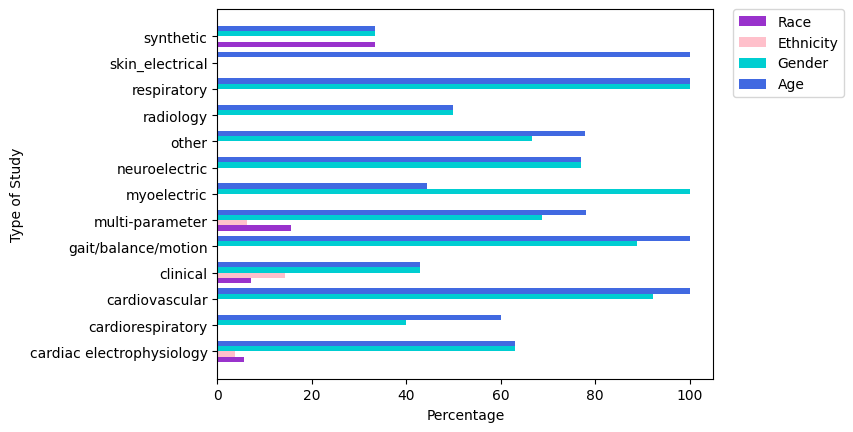

In [27]:
x = np.arange(13)
y1 = [5.56, 0, 0, 7.14, 0, 15.63, 0, 0, 0, 0, 0, 0, 33.33]
y2 = [3.70, 0, 0, 14.29, 0, 6.25, 0, 0, 0, 0, 0, 0, 0]
y3 = [62.96, 40, 92.31, 42.86, 88.89, 68.75, 100, 76.92, 66.67, 50, 100, 0, 33.33]
y4 = [62.96, 60, 100, 42.86, 100, 78.125, 44.44, 76.92, 77.78, 50, 100, 100, 33.33]
width = 0.2

# plot data in grouped manner of bar type
plt.barh(x-0.3, y1, width, color='darkorchid')
plt.barh(x-0.1, y2, width, color='pink')
plt.barh(x+0.1, y3, width, color='darkturquoise')
plt.barh(x+0.3, y4, width, color='royalblue')
plt.yticks(x, ['cardiac electrophysiology', 'cardiorespiratory', 'cardiovascular', 'clinical', 'gait/balance/motion', 'multi-parameter', 'myoelectric', 'neuroelectric', 'other', 'radiology', 'respiratory', 'skin_electrical', 'synthetic'])
plt.xlabel("Percentage")
plt.ylabel("Type of Study")
plt.legend(["Race", "Ethnicity", "Gender", "Age"], bbox_to_anchor=(1.04, 1), borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
 #         fancybox=True, shadow=True, ncol=5)


plt.show()

In [28]:
cardiac_electrophysiology = np.array([100, 100, 20.6897, 46.6667, -100, 0, 14.2857,
                     56.25, 11.1111, 79.4872, -20, 35.7143, -44.444, 6.25, 61.5385, 22.7273, 26.6667, 11.1111, 41.3043, -2.2222, 29.4964, 3.59712, 44.1379, 64.3693, 18.9549, 0.91743, 4.00127])
cardiorespiratory = np.array([11.1111 , 65.9597])
cardiovascular = np.array([100, 42.8571, -25, 0, -5.556, -17.647, 38.0102])
clinical = np.array([-12.5, 15.4279, 20.0922])
gait_balance_motion = np.array([-7.1429, 14.6067, 40, 42.8571, 20, 5.26316, 0, -3.5294, -29.557, 6, -24.18, -0.8547, -15.044, 19.2771, 15])
multi_parameter = np.array([100, 100, 11.1111, 68, 0, 0, 37.5, 29.4118, 40, 45.4545, 0, -3.7037, -36.364, -17.241, -35.484, 13.7255, 40, -20.755, 22.2222, 2.2222, 12.5828, -0.6803, -10.857, 4.49038, 1.53413])
myoelectric = np.array([100, 100, -29.032, 6.97674, -17.949,])
neuroelectric = np.array([45.4545, 0, 0, 27.2727, 37.5, 29.4118, -12.5, -54.545, -50, -12.5])
other = np.array([100, 100, 60, 61.9048, -25, 29.8077])
radiology = np.array([27.4949])
respiratory = np.array([0, 0])
synthetic = np.array([0])
skin_electrical = np.array([0])

In [29]:
cardiac_electrophysiology_mean = np.mean(cardiac_electrophysiology)
cardiorespiratory_mean = np.mean(cardiorespiratory)
cardiovascular_mean = np.mean(cardiovascular)
clinical_mean = np.mean(clinical)
gait_balance_motion_mean = np.mean(gait_balance_motion)
multi_parameter_mean = np.mean(multi_parameter)
myoelectric_mean = np.mean(myoelectric)
neuroelectric_mean = np.mean(neuroelectric)
other_mean = np.mean(other)
radiology_mean = np.mean(radiology)
respiratory_mean = np.mean(respiratory)
synthetic_mean = np.mean(synthetic)
skin_electrical_mean = np.mean(skin_electrical)

In [30]:
cardiac_electrophysiology_std = np.std(cardiac_electrophysiology)
cardiorespiratory_std = np.std(cardiorespiratory)
cardiovascular_std = np.std(cardiovascular)
clinical_std = np.std(clinical)
gait_balance_motion_std = np.std(gait_balance_motion)
multi_parameter_std = np.std(multi_parameter)
myoelectric_std = np.std(myoelectric)
neuroelectric_std = np.std(neuroelectric)
other_std = np.std(other)
radiology_std = np.std(radiology)
respiratory_std = np.std(respiratory)
synthetic_std = np.std(synthetic)
skin_electrical_std = np.std(skin_electrical)

In [31]:
labels = ['cardiac electrophysiology', 'cardiorespiratory', 'cardiovascular', 'clinical', 'gait/balance/motion', 'multi-parameter', 'myoelectric', 'neuroelectric', 'other', 'radiology', 'respiratory', 'skin_electrical', 'synthetic']
y_pos = np.arange(len(labels))
CTEs = [cardiac_electrophysiology_mean, cardiorespiratory_mean, cardiovascular_mean, clinical_mean, gait_balance_motion_mean, multi_parameter_mean, myoelectric_mean, neuroelectric_mean, other_mean, radiology_mean, respiratory_mean, skin_electrical_mean, synthetic_mean]
error = [cardiac_electrophysiology_std, cardiorespiratory_std, cardiovascular_std, clinical_std, gait_balance_motion_std, multi_parameter_std, myoelectric_std, neuroelectric_std, other_std, radiology_std, respiratory_std, skin_electrical_std, synthetic_std]

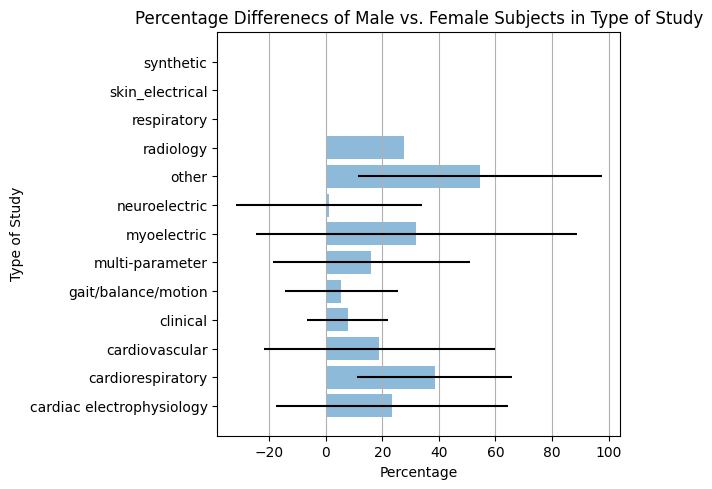

In [32]:
fig, ax = plt.subplots()
ax.barh(y_pos, CTEs,
       xerr=error, alpha=0.5, align = 'center')
ax.set_ylabel('Coefficient of Thermal Expansion')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.xaxis.grid(True)

plt.tight_layout()
plt.xlabel("Percentage")
plt.ylabel("Type of Study")
plt.title("Percentage Differenecs of Male vs. Female Subjects in Type of Study")
plt.show()

In [33]:
cardiac_electrophysiology = [100, 100, 20.6897, 46.6667, -100, 0, 14.2857,
                     56.25, 11.1111, 79.4872, -20, 35.7143, -44.444, 6.25, 61.5385, 22.7273, 26.6667, 11.1111, 41.3043, -2.2222, 29.4964, 3.59712, 44.1379, 64.3693, 18.9549, 0.91743, 4.00127]
cardiorespiratory = [11.1111 , 65.9597]
cardiovascular = [100, 42.8571, -25, 0, -5.556, -17.647, 38.0102]
clinical = [-12.5, 15.4279, 20.0922]
gait_balance_motion = [-7.1429, 14.6067, 40, 42.8571, 20, 5.26316, 0, -3.5294, -29.557, 6, -24.18, -0.8547, -15.044, 19.2771, 15]
multi_parameter = [100, 100, 11.1111, 68, 0, 0, 37.5, 29.4118, 40, 45.4545, 0, -3.7037, -36.364, -17.241, -35.484, 13.7255, 40, -20.755, 22.2222, 2.2222, 12.5828, -0.6803, -10.857, 4.49038, 1.53413]
myoelectric = [100, 100, -29.032, 6.97674, -17.949]
neuroelectric = [45.4545, 0, 0, 27.2727, 37.5, 29.4118, -12.5, -54.545, -50, -12.5]
other = [100, 100, 60, 61.9048, -25, 29.8077]
radiology = [27.4949]
respiratory = [0, 0]
synthetic = [0]

In [34]:
from scipy.stats import f_oneway
f_oneway(cardiorespiratory, cardiovascular, clinical, gait_balance_motion, multi_parameter, myoelectric, neuroelectric, other, radiology, respiratory, synthetic)


F_onewayResult(statistic=1.216493765320506, pvalue=0.29711578896383156)

In [35]:
data = csv[['total_n', 'log(n)', 'Sum']]
x = data['log(n)']
y = data['Sum']
plt.yticks(np.arange(min(x), 5, 1.0))
plt.scatter(x, y)
plt.xlabel("Log(N)")
plt.ylabel("Number of Demographic Factors")
plt.title("Effect of Sample Size on Deomgraphics Reporting")


#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

NameError: name 'csv' is not defined